# Data Cleaning and Integrity in unseen_data Dataset
This notebook demonstrates data cleaning operations such as handling missing data, removing duplicates, standardizing data, and detecting outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r'C:\Users\user\Downloads\oasis\unseen_data.csv'
data = data = pd.read_csv(file_path, encoding='ISO-8859-1')
# or use latin1
# data = pd.read_csv(file_path, encoding='latin1')


# Display basic info and first few rows of the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plant_ID          30 non-null     int64  
 1   Date              30 non-null     object 
 2   Temperature (°C)  30 non-null     int64  
 3   Humidity (%)      30 non-null     int64  
 4   pH Level          30 non-null     float64
 5   TDS Value (ppm)   30 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.5+ KB


,Plant_ID,Date,Temperature (°C),Humidity (%),pH Level,TDS Value (ppm)
0,1,9/15/2023,30,60,6.5,500
1,1,9/16/2023,31,62,6.6,505
2,1,9/17/2023,26,58,6.4,495
3,1,9/18/2023,32,57,6.7,490
4,1,9/19/2023,25,59,6.5,500


## Step 1: Handling Missing Data

In [2]:
missing_data_summary = data.isnull().sum()
missing_percentage = (missing_data_summary / len(data)) * 100
print(f"Missing Data Summary:\n{missing_data_summary[missing_data_summary > 0]}")
print(f"Missing Data Percentage:\n{missing_percentage[missing_percentage > 0]}")

# Step 2: Handling missing values
def handle_missing_data(df):
    for col in df.columns:
        missing_count = df[col].isnull().sum()
        
        # Skip columns with no missing data
        if missing_count == 0:
            continue
        
        # Handle missing numeric columns
        if df[col].dtype in ['float64', 'int64']:
            mean_value = df[col].mean()
            median_value = df[col].median()
            
            # If data is normally distributed, fill with mean; otherwise use median
            df[col].fillna(median_value, inplace=True)
            print(f"Filled missing numeric values in '{col}' with median: {median_value}")
        
        # Handle missing categorical columns
        elif df[col].dtype == 'object':
            mode_value = df[col].mode()[0]
            
            # Fill categorical columns with the most frequent value (mode)
            df[col].fillna(mode_value, inplace=True)
            print(f"Filled missing categorical values in '{col}' with mode: {mode_value}")
        
        # Handle missing datetime columns
        elif np.issubdtype(df[col].dtype, np.datetime64):
            # Fill datetime columns with the most common or nearest date
            most_frequent_date = df[col].mode()[0]
            df[col].fillna(most_frequent_date, inplace=True)
            print(f"Filled missing datetime values in '{col}' with mode: {most_frequent_date}")
    
    return df

# Apply missing data handling
data_cleaned = handle_missing_data(data)

# Step 3: Verify that no missing data remains
missing_data_cleaned_summary = data_cleaned.isnull().sum()
print(f"\nMissing Data After Cleaning:\n{missing_data_cleaned_summary[missing_data_cleaned_summary > 0]}")


Missing Data Summary:
Series([], dtype: int64)
Missing Data Percentage:
Series([], dtype: float64)

Missing Data After Cleaning:
Series([], dtype: int64)


## Step 2: Removing Duplicates

In [3]:
# Drop duplicate rows if any
data.drop_duplicates(inplace=True)

# Verify that duplicates are removed
data.duplicated().sum()

np.int64(0)

## Step 3: Standardizing Data

In [4]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Display the head to verify standardization
data.head()

,Plant_ID,Date,Temperature (°C),Humidity (%),pH Level,TDS Value (ppm)
0,-1.0,9/15/2023,0.317885,-0.058824,-7.453560e-01,-0.112923
1,-1.0,9/16/2023,0.699347,0.529412,6.620091e-15,0.400363
2,-1.0,9/17/2023,-1.207963,-0.647059,-1.490712e+00,-0.626209
3,-1.0,9/18/2023,1.080809,-0.941176,7.453560e-01,-1.139496
4,-1.0,9/19/2023,-1.589425,-0.352941,-7.453560e-01,-0.112923


## Step 4: Outlier Detection using IQR

In [5]:
outliers = pd.DataFrame()
for col in numeric_columns:
    outliers[col] = np.abs(data[col]) > 3  # Marks True for outliers

# Display rows with outliers
outlier_rows = data[outliers.any(axis=1)]
print(f"Outlier Rows:\n{outlier_rows}")

Outlier Rows:
Empty DataFrame
Columns: [Plant_ID, Date, Temperature (°C), Humidity (%), pH Level, TDS Value (ppm)]
Index: []


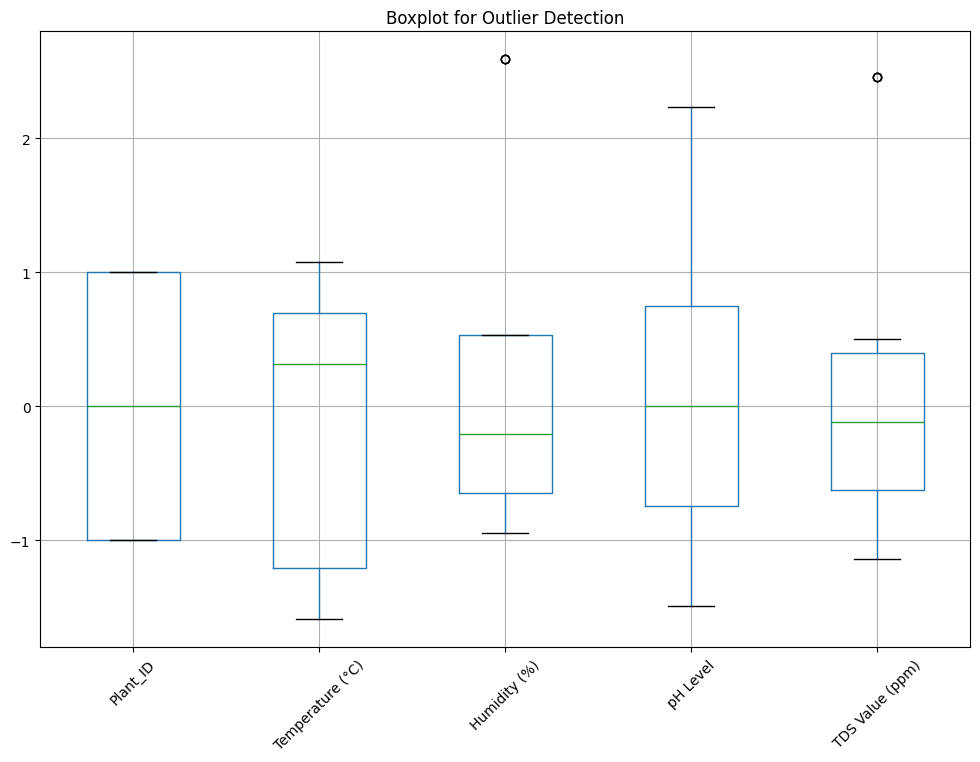

In [6]:
plt.figure(figsize=(12, 8))

# Ensure column names are passed correctly
data.boxplot(column=list(numeric_columns))
plt.xticks(rotation=45)
plt.title('Boxplot for Outlier Detection')
plt.show()